<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60-2.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.581077,91.642831,72.983431,0.854541,254.061880,253.041848,1.020032
1,0.0,1.0,53.272152,20.568920,91.635594,1.618237,177.094903,175.692244,1.402659
2,0.0,2.0,61.365074,82.468999,25.624836,-0.321764,179.137145,179.261605,-0.124460
3,0.0,3.0,85.560193,50.145713,96.357922,-0.903383,241.160445,242.061288,-0.900844
4,0.0,4.0,92.533655,38.949585,95.099698,-0.445301,236.137637,236.580510,-0.442873
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.873113,83.605985,62.119365,1.360601,233.959064,232.429739,1.529325
59996,999.0,56.0,80.488536,21.242046,53.532452,-0.142728,165.120306,165.271394,-0.151088
59997,999.0,57.0,63.152250,28.319098,50.742294,-0.852306,151.361336,152.219619,-0.858283
59998,999.0,58.0,55.435368,61.877264,53.834585,1.195532,182.342749,181.065188,1.277560


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    78.581077  91.642831  72.983431  ...  254.061880  253.041848  1.020032
      1.0    53.272152  20.568920  91.635594  ...  177.094903  175.692244  1.402659
      2.0    61.365074  82.468999  25.624836  ...  179.137145  179.261605 -0.124460
      3.0    85.560193  50.145713  96.357922  ...  241.160445  242.061288 -0.900844
      4.0    92.533655  38.949585  95.099698  ...  236.137637  236.580510 -0.442873
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   76.873113  83.605985  62.119365  ...  233.959064  232.429739  1.529325
      56.0   80.488536  21.242046  53.532452  ...  165.120306  165.271394 -0.151088
      57.0   63.152250  28.319098  50.742294  ...  151.361336  152.219619 -0.858283
      58.0   55.435368  61.877264  53.834585  ...  182.342749  181.065188  1.277560
      59.0   40.210793  35.617880  85.778043  ...  171.860698  171.417116  0.443582

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    78.581077  91.642831  72.983431  ...  254.061880  253.041848  1.020032
      1.0    53.272152  20.568920  91.635594  ...  177.094903  175.692244  1.402659
      2.0    61.365074  82.468999  25.624836  ...  179.137145  179.261605 -0.124460
      3.0    85.560193  50.145713  96.357922  ...  241.160445  242.061288 -0.900844
      4.0    92.533655  38.949585  95.099698  ...  236.137637  236.580510 -0.442873
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   76.873113  83.605985  62.119365  ...  233.959064  232.429739  1.529325
      56.0   80.488536  21.242046  53.532452  ...  165.120306  165.271394 -0.151088
      57.0   63.152250  28.319098  50.742294  ...  151.361336  152.219619 -0.858283
      58.0   55.435368  61.877264  53.834585  ...  182.342749  181.065188  1.277560
      59.0   40.210793  35.617880  85.778043  ...  171.860698  171.417116  0.443582

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.581077,91.642831,72.983431,0.854541,254.061880,253.041848,1.020032
1,0.0,1.0,53.272152,20.568920,91.635594,1.618237,177.094903,175.692244,1.402659
2,0.0,2.0,61.365074,82.468999,25.624836,-0.321764,179.137145,179.261605,-0.124460
3,0.0,3.0,85.560193,50.145713,96.357922,-0.903383,241.160445,242.061288,-0.900844
4,0.0,4.0,92.533655,38.949585,95.099698,-0.445301,236.137637,236.580510,-0.442873
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,76.873113,83.605985,62.119365,1.360601,233.959064,232.429739,1.529325
59996,999.0,56.0,80.488536,21.242046,53.532452,-0.142728,165.120306,165.271394,-0.151088
59997,999.0,57.0,63.152250,28.319098,50.742294,-0.852306,151.361336,152.219619,-0.858283
59998,999.0,58.0,55.435368,61.877264,53.834585,1.195532,182.342749,181.065188,1.277560


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    78.581077  91.642831  72.983431  ...  254.061880  253.041848  1.020032
      1.0    53.272152  20.568920  91.635594  ...  177.094903  175.692244  1.402659
      2.0    61.365074  82.468999  25.624836  ...  179.137145  179.261605 -0.124460
      3.0    85.560193  50.145713  96.357922  ...  241.160445  242.061288 -0.900844
      4.0    92.533655  38.949585  95.099698  ...  236.137637  236.580510 -0.442873
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   76.873113  83.605985  62.119365  ...  233.959064  232.429739  1.529325
      56.0   80.488536  21.242046  53.532452  ...  165.120306  165.271394 -0.151088
      57.0   63.152250  28.319098  50.742294  ...  151.361336  152.219619 -0.858283
      58.0   55.435368  61.877264  53.834585  ...  182.342749  181.065188  1.277560
      59.0   40.210793  35.617880  85.778043  ...  171.860698  171.417116  0.443582

[60000 rows x 7 columns]

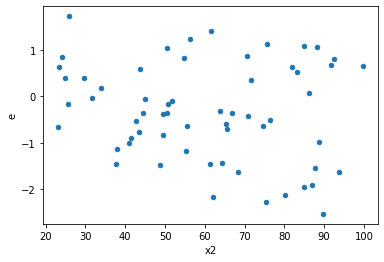

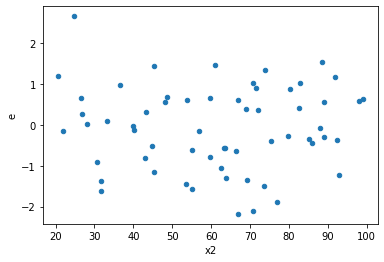

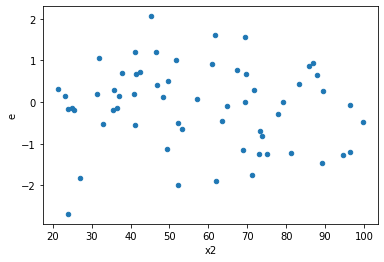

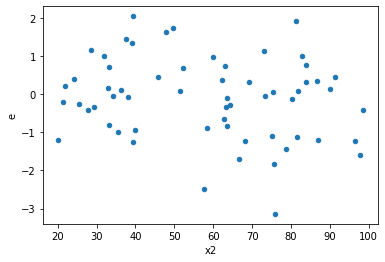

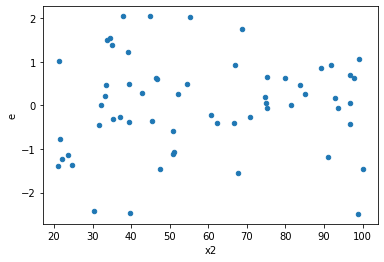

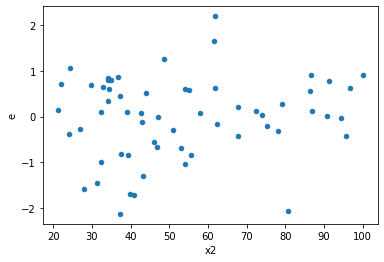

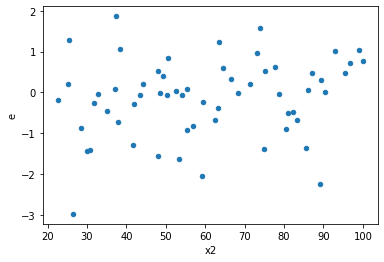

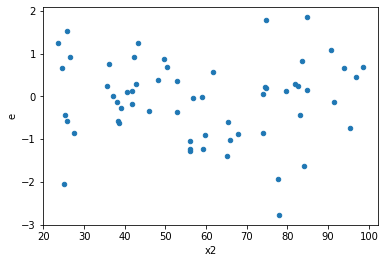

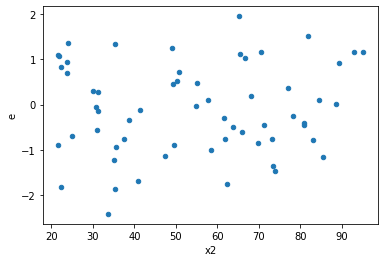

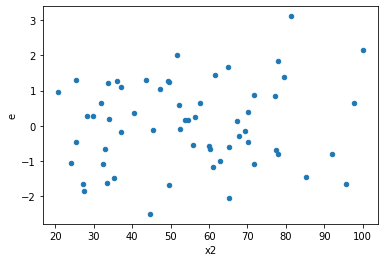

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,32.0,22.0,29.821839273267784,21.36655222841855,0.9319324772896183,0.9712069194735704,1.0421430126549251,0.9362678750017777,0.5318660624991112,0.46813393750088883,Reject005=1 : Homoscedasticity
4.0,21.0,33.0,8.978600320480844,24.99316572161159,0.4275523962133735,0.7573686582306542,1.771405481382645,0.13748002595753972,0.9312599870212301,0.06874001297876986,Reject005=1 : Homoscedasticity
5.0,25.0,29.0,13.599551893827977,23.92783677243163,0.5439820757531191,0.8250978197390217,1.5167739095019084,0.2798666446193008,0.8600666776903496,0.1399333223096504,Reject005=1 : Homoscedasticity
6.0,27.0,27.0,23.781317198037478,27.451933705228544,0.8807895258532399,1.016738285378835,1.15434874681769,0.7118853596881047,0.6440573201559476,0.35594267984405237,Reject005=1 : Homoscedasticity
7.0,27.0,27.0,13.779027708807488,16.37033333763035,0.5103343595854626,0.6063086421344573,1.188061573253569,0.6575403285007697,0.6712298357496151,0.32877016425038486,Reject005=1 : Homoscedasticity
10.0,26.0,28.0,22.153772087358046,35.622014344478785,0.8520681572060786,1.2722147980170995,1.4930904144906396,0.3006520828989492,0.8496739585505254,0.1503260414494746,Reject005=1 : Homoscedasticity
11.0,32.0,22.0,27.613877504485096,24.26441420240781,0.8629336720151592,1.1029279182912641,1.2781143604185246,0.5545424331111459,0.722728783444427,0.27727121655557296,Reject005=1 : Homoscedasticity
14.0,31.0,23.0,35.68769595882572,27.618687948509837,1.1512159986717974,1.2008125195004278,1.043081855087014,0.9299317821947743,0.5350341089026128,0.4649658910973872,Reject005=1 : Homoscedasticity
15.0,26.0,28.0,14.858783587525929,29.090340296886666,0.571491676443305,1.0389407248888094,1.8179455059690233,0.12436358770280198,0.937818206148599,0.06218179385140099,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,24.0,30.0,16.636218991427317,19.07537848500815,0.6931757913094715,0.6358459495002717,0.9172939353509468,0.8367706574345214,Reject005=1 : Homoscedasticity
1.0,28.0,26.0,37.708269569901915,16.53201003491067,1.3467239132107827,0.6358465398042565,0.4721432014140948,0.05459216937903661,Reject005=1 : Homoscedasticity
2.0,31.0,23.0,36.31582460323422,23.402479469714365,1.1714782130075554,1.0174991073788855,0.868559992051959,0.7045889230314961,Reject005=1 : Homoscedasticity
3.0,32.0,22.0,29.821839273267784,21.36655222841855,0.9319324772896183,0.9712069194735704,1.0421430126549251,0.9362678750017777,Reject005=1 : Homoscedasticity
4.0,21.0,33.0,8.978600320480844,24.99316572161159,0.4275523962133735,0.7573686582306542,1.771405481382645,0.13748002595753972,Reject005=1 : Homoscedasticity
5.0,25.0,29.0,13.599551893827977,23.92783677243163,0.5439820757531191,0.8250978197390217,1.5167739095019084,0.2798666446193008,Reject005=1 : Homoscedasticity
6.0,27.0,27.0,23.781317198037478,27.451933705228544,0.8807895258532399,1.016738285378835,1.15434874681769,0.7118853596881047,Reject005=1 : Homoscedasticity
7.0,27.0,27.0,13.779027708807488,16.37033333763035,0.5103343595854626,0.6063086421344573,1.188061573253569,0.6575403285007697,Reject005=1 : Homoscedasticity
8.0,32.0,22.0,27.536517524231368,10.086832031216279,0.8605161726322302,0.4584923650552854,0.5328108635690187,0.10207528074527404,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      955
Reject005=0 : Heteroscedasticity     45
Name: Result_test, dtype: int64